In [1]:
import os

os.chdir('/workspaces/fuzzy-expert')

In [2]:
import warnings

warnings.filterwarnings("ignore")

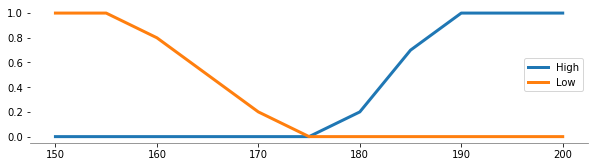

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from fuzzy_expert.variable import FuzzyVariable

variables = {
    "score": FuzzyVariable(
        universe_range=(150, 200),
        terms={
            "High": [(175, 0), (180, 0.2), (185, 0.7), (190, 1)],
            "Low": [(155, 1), (160, 0.8), (165, 0.5), (170, 0.2), (175, 0)],
        },
    ),
    "ratio": FuzzyVariable(
        universe_range=(0.1, 1),
        terms={
            "Goodr": [(0.3, 1), (0.4, 0.7), (0.41, 0.3), (0.42, 0)],
            "Badr": [(0.44, 0), (0.45, 0.3), (0.5, 0.7), (0.7, 1)],
        },
    ),
    #
    "credit": FuzzyVariable(
        universe_range=(0, 10),
        terms={
            "Goodc": [(2, 1), (3, 0.7), (4, 0.3), (5, 0)],
            "Badc": [(5, 0), (6, 0.3), (7, 0.7), (8, 1)],
        },
    ),
    #
    "decision": FuzzyVariable(
        universe_range=(0, 10),
        terms={
            "Approve": [(5, 0), (6, 0.3), (7, 0.7), (8, 1)],
            "Reject": [(2, 1), (3, 0.7), (4, 0.3), (5, 0)],
        },
    ),
    #
    "other_decision": FuzzyVariable(
        universe_range=(0, 10),
        terms={
            "Approve": [(5, 0), (6, 0.3), (7, 0.7), (8, 1)],
            "Reject": [(2, 1), (3, 0.7), (4, 0.3), (5, 0)],
        },
    ),
}

plt.figure(figsize=(10, 2.5))
variables["score"].plot()

In [4]:
from fuzzy_expert.rule import FuzzyRule

rule_1 = FuzzyRule(
    premise=[
        ("score", "High"),
        ("AND", "ratio", "Goodr"),
        ("AND", "credit", "Goodc"),
    ],
    consequence=[("decision", "Approve")],
)

rule_2 = FuzzyRule(
    premise=[
        ("score", "Low"),
        ("AND", "ratio", "Badr"),
        ("OR", "credit", "Badc"),
    ],
    consequence=[("decision", "Reject")],
)

print(rule_1)
print()
print(rule_2)

IF  score IS High
    AND ratio IS Goodr
    AND credit IS Goodc
THEN
    decision IS Approve
CF = 1.00
Threshold-CF = 1.00


IF  score IS Low
    AND ratio IS Badr
    OR credit IS Badc
THEN
    decision IS Reject
CF = 1.00
Threshold-CF = 1.00



In [5]:
from fuzzy_expert.inference import DecompositionalInference

model = DecompositionalInference(
    and_operator="min",
    or_operator="max",
    implication_operator="Rc",
    composition_operator="max-min",
    production_link="max",
    defuzzification_operator="cog",
)

model(
    variables=variables,
    rules=[rule_1, rule_2],
    score=190,
    ratio=0.39,
    credit=1.5,
)

({'decision': 8.02328616848237}, 1.0)

In [6]:
from ipywidgets import interact, widgets

def demo(score, ratio, credit):
    plt.figure(figsize=(10,6))    
    model.plot(
        variables=variables,
        rules = [rule_1, rule_2],
        score=score,
        ratio=ratio,
        credit=credit,
    )

interact(
    demo, 
    score=widgets.FloatSlider(min=150, max=200),
    ratio=widgets.FloatSlider(min=0.1, max=1),
    credit=widgets.FloatSlider(min=0, max=10),
)

interactive(children=(FloatSlider(value=150.0, description='score', max=200.0, min=150.0), FloatSlider(value=0…

<function __main__.demo(score, ratio, credit)>

In [ ]:
model = DecompositionalInference(
    and_operator="min",
    or_operator="max",
    implication_operator="Rc",
    composition_operator="max-min",
    production_link="max",
    defuzzification_operator="cog",
)

data_score = [(180, 0.0), (190, 0.2), (195, 0.8), (200, 1.0)]
data_ratio = [(0.1, 1), (0.3, 1), (0.4, 0.6), (0.41, 0.2), 
              (0.42, 0)]
data_credit = [(0, 0), (1, 1), (2, 1), (3, 0.0), (4, 0.0)]

plt.figure(figsize=(10,6))
model.plot(
    variables=variables,
    rules=[rule_1, rule_2],
    score=data_score,
    ratio=data_ratio,
    credit=data_credit,
)

In [ ]:
data_score = [(150, 0.9), (155, 0.7), (160, 0.5), (165, 0.3), 
              (170, 0.0)]
data_ratio = [(0.44, 0), (0.45, 0.3), (0.5, 0.5), (0.7, 0.7), 
              (1, 0.9)]
data_credit = [(6, 0), (7, 0.3), (8, 0.5), (9, 0.7), (10, 0.9)]

plt.figure(figsize=(10,6))
model.plot(
    variables=variables,
    rules=[rule_1, rule_2],
    score=data_score,
    ratio=data_ratio,
    credit=data_credit,
)

In [ ]:
data_score = [(185, 0.0), (190, 0.4), (195, 0.6), (200, 0.8)]
data_ratio = [(0.45, 0), (0.5, 0.4), (0.7, 0.6), (1, 0.8)]
data_credit = [(2, 1), (3, 0.8), (4, 0.6), (5, 0.4), (6, 0)]

plt.figure(figsize=(10,6))
model.plot(
    variables=variables,
    rules=[rule_1, rule_2],
    score=data_score,
    ratio=data_ratio,
    credit=data_credit,
)

In [ ]:
rule_1 = FuzzyRule(
    cf = 0.9,
    premises=[
        (score, "High"),
        ("AND", ratio, "Goodr"),
        ("AND", credit, "Goodc"),
    ],
    consequence=(decision, "Approve"),
)

rule_2 = FuzzyRule(
    cf=0.9,
    premises=[
        (score, "Low"),
        ("AND", ratio, "Badr"),
        ("OR", credit, "Badc"),
    ],
    consequence=(decision, "Reject"),
)

model(
    rules=[rule_1, rule_2],
    score=(190, 1),
    ratio=(0.39, 0.8),
    credit=1.5,
)